## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Customer_churn Dataset**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
100% 172k/172k [00:00<00:00, 684kB/s]
100% 172k/172k [00:00<00:00, 684kB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/telco-customer-churn.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
df1= pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **A) Data Manipulation**

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**TotalCharges should be float but it is an object.Lets convert it to numbers**

In [7]:
df1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df1.TotalCharges)

ValueError: Unable to parse string " " at position 488

**some values seems to be not numbers but blank string. Let's find out such rows**

In [9]:
df1[pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df1.shape

(7043, 21)

**Remove rows with space in TotalCharges**

In [11]:
df = df1[df1.TotalCharges!=' ']
df.shape

(7032, 21)

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

<ipython-input-13-e4980e5e83ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [14]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [15]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [20]:
print_unique_col_values(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [21]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

<ipython-input-21-1fed3bd488c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No internet service','No',inplace=True)
<ipython-input-21-1fed3bd488c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No phone service','No',inplace=True)


In [22]:
print_unique_col_values(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Let's Convert Yes and No to 1 or 0**

In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

<ipython-input-23-479965e89572>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace({'Yes': 1,'No': 0},inplace=True)


In [24]:
for col in df:
    print(f'{col}: {df[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

<ipython-input-25-7f2ac4c24de4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace({'Female':1,'Male':0},inplace=True)


In [26]:
df.gender.unique()

array([1, 0])

**One hot encoding for categorical columns**

In [27]:
df2 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5420,7929-SKFGK,0,0,1,0,70,1,1,1,1,...,False,True,False,False,False,True,False,True,False,False
2128,1163-ONYEY,0,0,1,1,41,1,1,1,1,...,True,False,False,True,False,False,False,True,False,False
6926,1450-SKCVI,1,0,0,0,56,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
3728,6352-GIGGQ,0,0,0,0,67,1,1,1,1,...,True,False,False,False,True,False,True,False,False,False
3750,4415-WNGVR,1,1,1,0,12,1,0,1,0,...,True,False,False,False,True,False,False,False,True,False


In [29]:
df2.drop('customerID',axis='columns',inplace=True)

In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [31]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

<hr>

**a. Find the total number of male customers**

In [33]:
sum(df1['gender']=="Male")

3555

<hr>

**b. Find the total number of customers whose Internet Service is ‘DSL’**

In [34]:
sum(df1['InternetService']=="DSL")

2421

<hr>

**c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’**

In [35]:
new_customer=df1[(df1['gender']=='Female') & (df1['SeniorCitizen']==1) & (df1['PaymentMethod']=='Mailed check')]

new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


<hr>

**d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
than 500$ & store the result in ‘new_customer’**

In [36]:
new_customer=df[(df['tenure']<10) | (df['TotalCharges']<500)]

new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,1,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
7,6713-OKOMC,1,0,0,0,10,0,0,DSL,1,...,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0


### **B) Data Visualization**

**a. Build a pie-chart to show the distribution of customers would be churning out**

In [37]:
names = df2["Churn"].value_counts().keys().tolist()
sizes= df2["Churn"].value_counts().tolist()

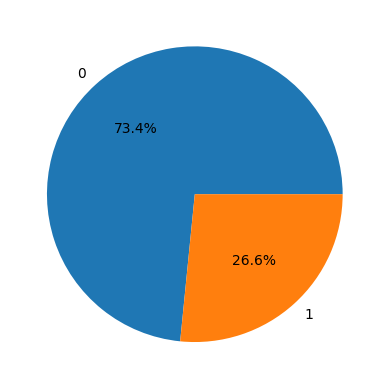

In [ ]:
plt.pie(sizes,labels=names,autopct="%0.1f%%")
plt.show()

**b. Build a bar-plot to show the distribution of ‘Internet Service’**

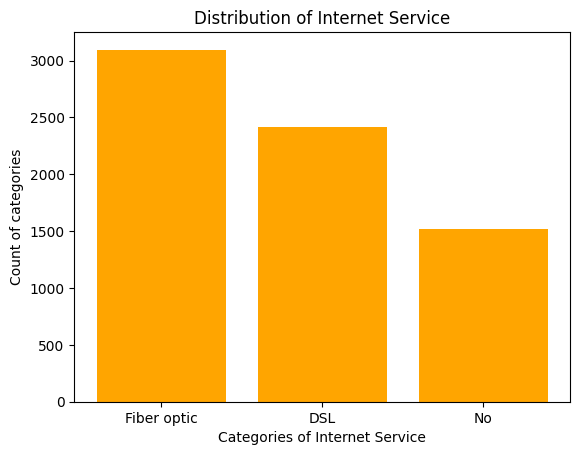

In [38]:
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='orange')
#We are creating the bar-plot using plt.bar()
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

### **C) Model Building**

In [39]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

**a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column:**


In [105]:
x=df2[['tenure']]
y=df2[['Churn']]

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

**i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.**

**ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function**

In [42]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**iii. Use ‘Adam’ as the optimization algorithm**

In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**iv. Fit the model on the train set, with number of epochs to be 150**

In [44]:
history = model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 [==============================] - 3s 5ms/step - loss: 0.6326 - accuracy: 0.7343 - val_loss: 0.5857 - val_accuracy: 0.7341
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5589 - accuracy: 0.7343 - val_loss: 0.5447 - val_accuracy: 0.7341
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5381 - accuracy: 0.7343 - val_loss: 0.5355 - val_accuracy: 0.7341
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5297 - accuracy: 0.7343 - val_loss: 0.5283 - val_accuracy: 0.7341
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5224 - accuracy: 0.7343 - val_loss: 0.5222 - val_accuracy: 0.7341
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5167 - accuracy: 0.7343 - val_loss: 0.5179 - val_accuracy: 0.7341
Epoch 7/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5132 - accuracy: 0.7343 - val_loss: 0.5154 - val_accuracy: 0.7341

***mean validation accuracy***

In [45]:
np.mean(model.history.history['val_accuracy'])

0.7456556049982707

So, the mean validation accuracy comes out to be 74.56%

<hr>

**v. Predict the values on the test set and build a confusion matrix**

In [46]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_score(y_test,y_pred)

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

66/66 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1549,    0],
       [ 561,    0]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

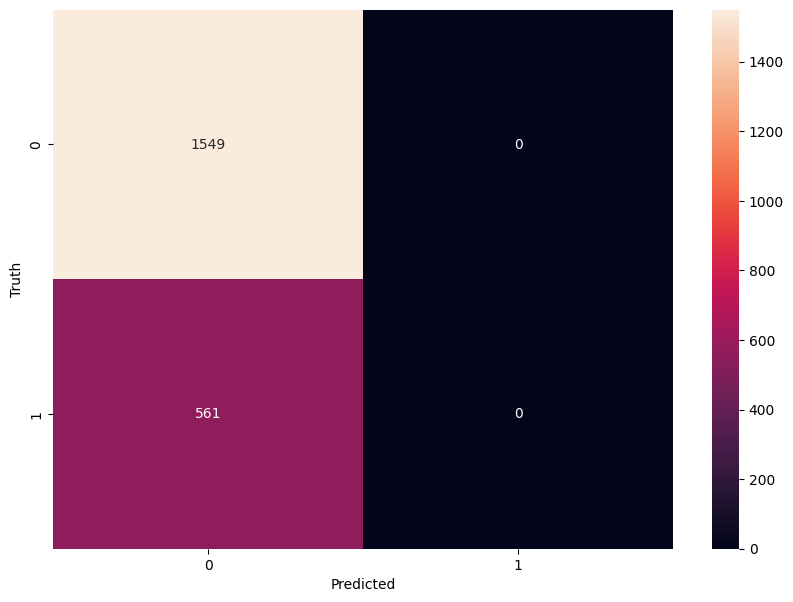

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7341232227488151

**vi. Plot the ‘Accuracy vs Epochs’ graph**

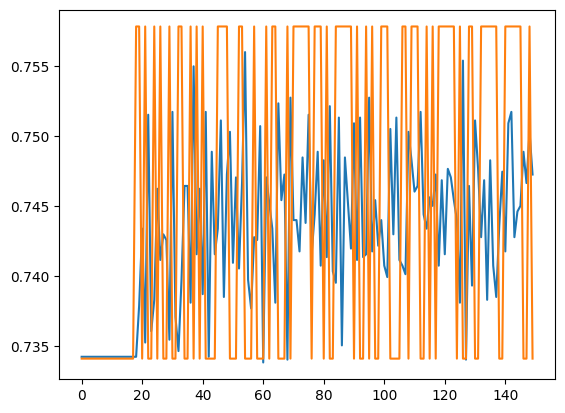

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

**b. Build the 2nd model using same target and feature variables:**

**i. Add a drop-out layer after the input layer with drop-out value of 0.3**

**ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2**

In [107]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

**iii. Predict the values on the test set and build a confusion matrix**

In [108]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
hist = model.fit(x_train, y_train, epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 [==============================] - 4s 8ms/step - loss: 0.5929 - acc: 0.7322 - val_loss: 0.5507 - val_acc: 0.7341
Epoch 2/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5638 - acc: 0.7343 - val_loss: 0.5354 - val_acc: 0.7341
Epoch 3/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5487 - acc: 0.7343 - val_loss: 0.5295 - val_acc: 0.7341
Epoch 4/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5481 - acc: 0.7343 - val_loss: 0.5257 - val_acc: 0.7341
Epoch 5/150
154/154 [==============================] - 1s 7ms/step - loss: 0.5421 - acc: 0.7343 - val_loss: 0.5243 - val_acc: 0.7341
Epoch 6/150
154/154 [==============================] - 1s 7ms/step - loss: 0.5437 - acc: 0.7343 - val_loss: 0.5235 - val_acc: 0.7341
Epoch 7/150
154/154 [==============================] - 1s 5ms/step - loss: 0.5436 - acc: 0.7343 - val_loss: 0.5242 - val_acc: 0.7341
Epoch 8/150
154/154 [==============================] - 1s 4ms/step - 

***mean validation accuracy***

In [118]:
np.mean(model.history.history['val_acc'])

0.7341232299804688

So, the mean validation accuracy comes out to be 73.41%

<hr>

In [119]:
y_predictions = np.argmax(model.predict(x_test),axis=1)
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_predictions)
cm1

66/66 [==============================] - 0s 4ms/step


array([[1549,    0],
       [ 561,    0]])

Text(95.72222222222221, 0.5, 'Truth')

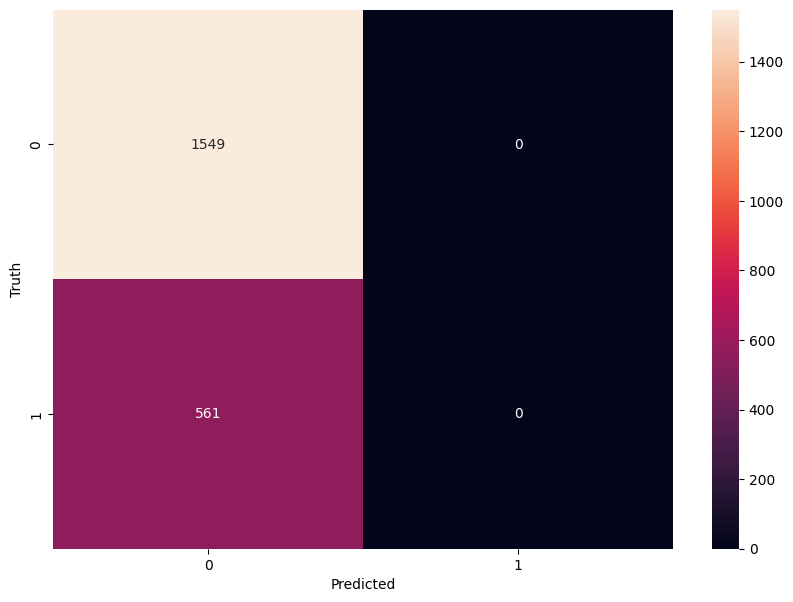

In [120]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predictions)

0.7341232227488151

**iv. Plot the ‘Accuracy vs Epochs’ graph**

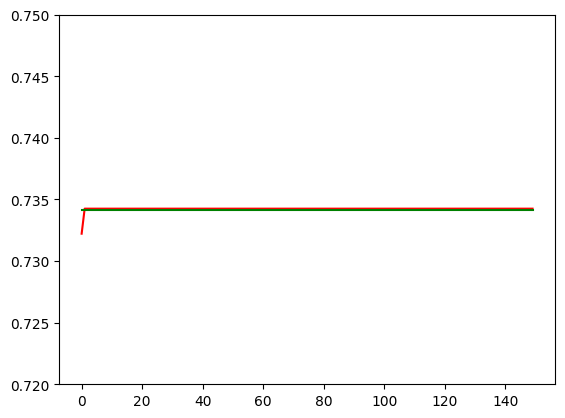

In [129]:
plt.ylim(0.72,0.75)
plt.plot(hist.history['acc'],color='r')
plt.plot(hist.history['val_acc'],color='g')

### **c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:**

In [50]:
X=df2[['MonthlyCharges','tenure','TotalCharges']]#Features
Y=df2[['Churn']]#Target

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

**i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.**

**ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function**

In [68]:
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**iii. Use ‘Adam’ as the optimization algorithm**

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

**iv. Fit the model on the train set, with number of epochs to be 150**

In [87]:
History = model.fit(X_train, Y_train, epochs=150,validation_data=(X_test,Y_test))

Epoch 1/150
154/154 [==============================] - 1s 8ms/step - loss: 0.4443 - acc: 0.7909 - val_loss: 0.4606 - val_acc: 0.7758
Epoch 2/150
154/154 [==============================] - 1s 6ms/step - loss: 0.4452 - acc: 0.7897 - val_loss: 0.4593 - val_acc: 0.7829
Epoch 3/150
154/154 [==============================] - 1s 7ms/step - loss: 0.4438 - acc: 0.7903 - val_loss: 0.4650 - val_acc: 0.7806
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.4447 - acc: 0.7883 - val_loss: 0.4607 - val_acc: 0.7754
Epoch 5/150
154/154 [==============================] - 1s 4ms/step - loss: 0.4443 - acc: 0.7915 - val_loss: 0.4611 - val_acc: 0.7796
Epoch 6/150
154/154 [==============================] - 1s 6ms/step - loss: 0.4438 - acc: 0.7938 - val_loss: 0.4595 - val_acc: 0.7796
Epoch 7/150
154/154 [==============================] - 1s 7ms/step - loss: 0.4442 - acc: 0.7891 - val_loss: 0.4594 - val_acc: 0.7829
Epoch 8/150
154/154 [==============================] - 1s 7ms/step - 

***mean validation accuracy***

In [88]:
np.mean(model.history.history['val_acc'])

0.7802811960379282

So, the mean validation accuracy comes out to be 78.03%

<hr>

**v. Predict the values on the test set and build a confusion matrix**

In [94]:
Y_predictions = np.argmax(model.predict(X_test),axis=1)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_test,Y_predictions)
cm2


66/66 [==============================] - 0s 2ms/step


array([[1549,    0],
       [ 561,    0]])

Text(95.72222222222221, 0.5, 'Truth')

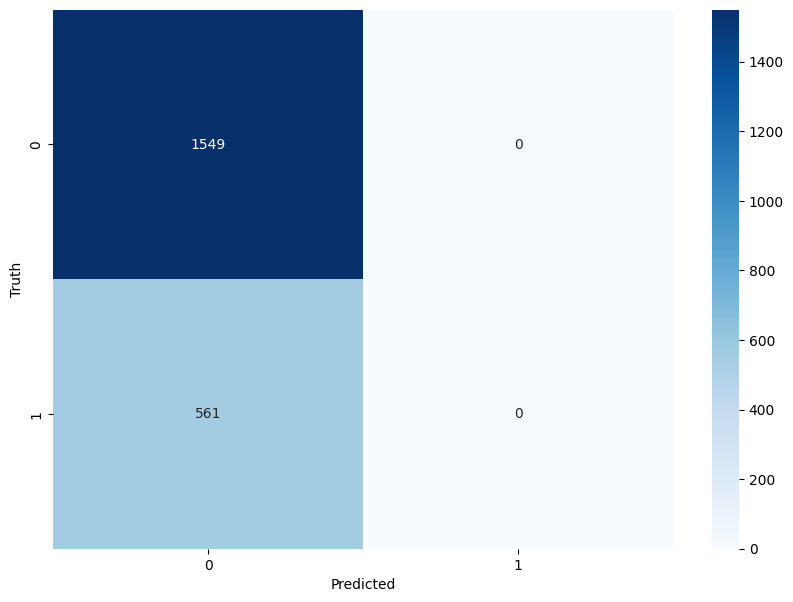

In [95]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d',cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predictions)

0.7341232227488151

**vi. Plot the ‘Accuracy vs Epochs’ graph**

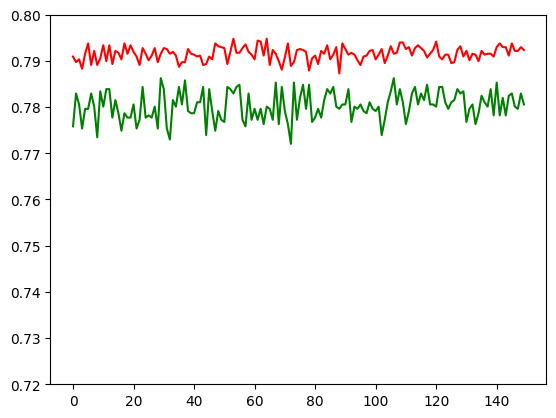

In [101]:
plt.ylim(0.72,0.80)
plt.plot(History.history['acc'],color='r')
plt.plot(History.history['val_acc'],color='g')

**<hr>**

## **Conclusion:**
### **The first model gave us a mean validation accuracy of 74.56%, the second model had accuracy of 73.41% and the third model had a mean validation accuracy of 78.03%.**

**<hr>**